# Heart Rate Prediction Project
This notebook performs an analysis and prediction of heart rate using the Framingham dataset.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [1]:
# Load dataset

import zipfile
import pandas as pd
zip_path = r'C:\Users\srila\Downloads\downloaded-file.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('extracted_data')  
    
csv_path = 'extracted_data/framingham.csv'
df = pd.read_csv(csv_path)

df.head()



,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [2]:
# Checking for null values

# Display the total number of missing values per column
missing_values = df.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]



education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64

In [3]:
# Filling missing values with median
df = df.fillna(df.median(numeric_only=True))


Statistical Summary:
              male          age    education  currentSmoker   cigsPerDay  \
count  4240.000000  4240.000000  4240.000000    4240.000000  4240.000000   
mean      0.429245    49.580189     1.979953       0.494104     8.944340   
std       0.495027     8.572942     1.007087       0.500024    11.904777   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4240.000000      4240.000000   4240.000000  4240.000000  4240.000000   
mean      0.029245         0.005896      0.310613     0.025708   236.667689   
std       0.168513         0.076569      0.462799     0.1

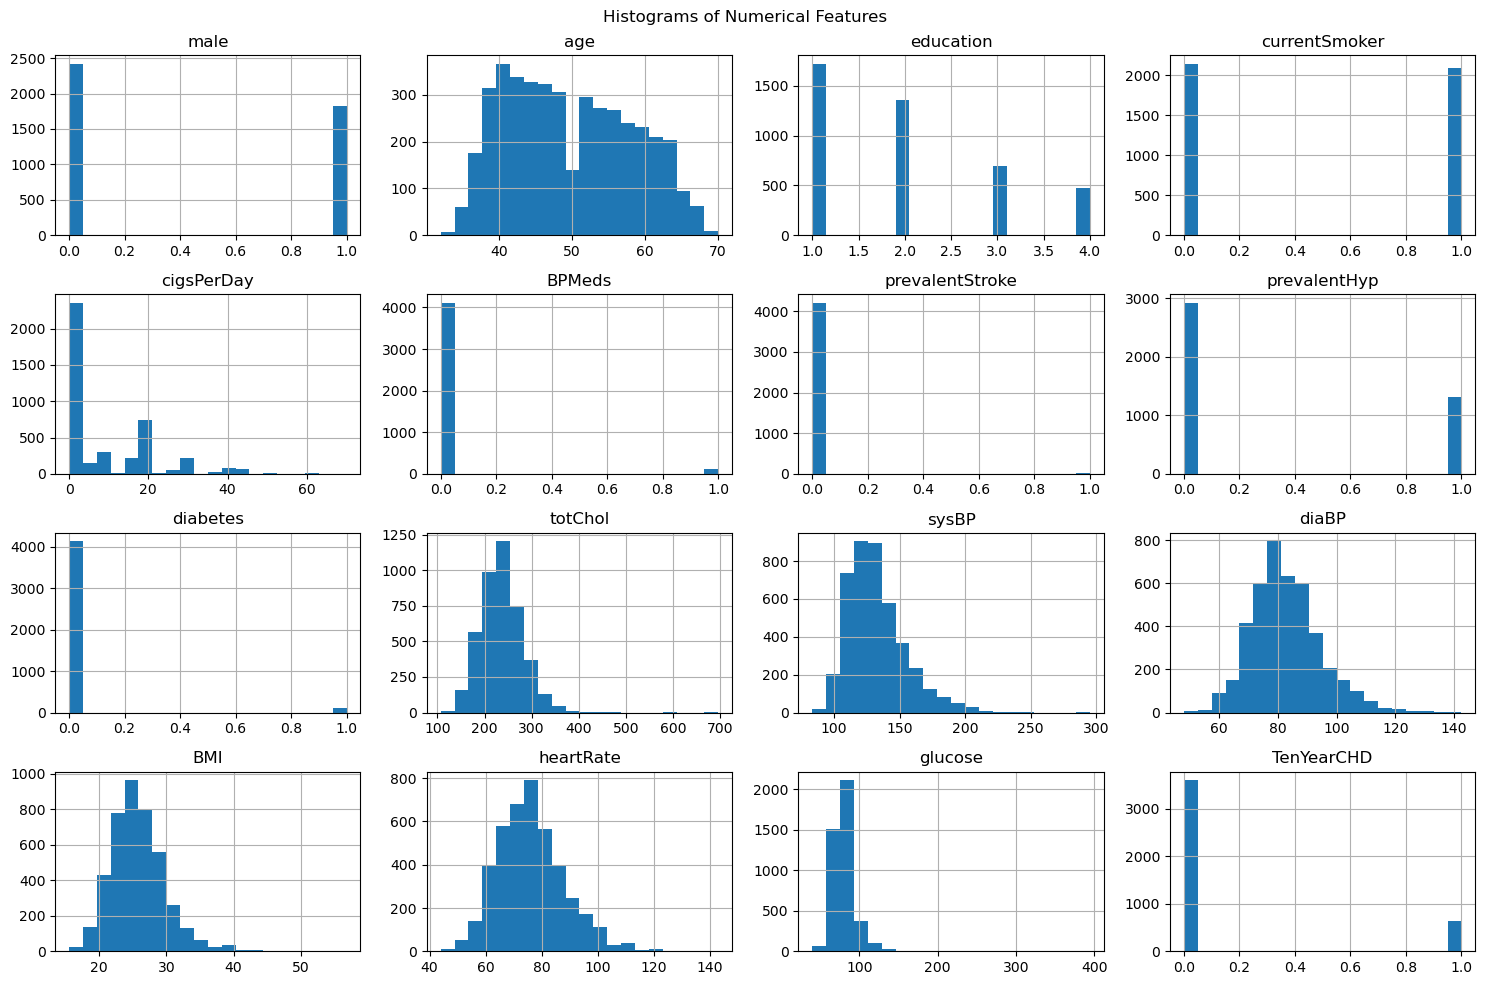


Target Variable Distribution:


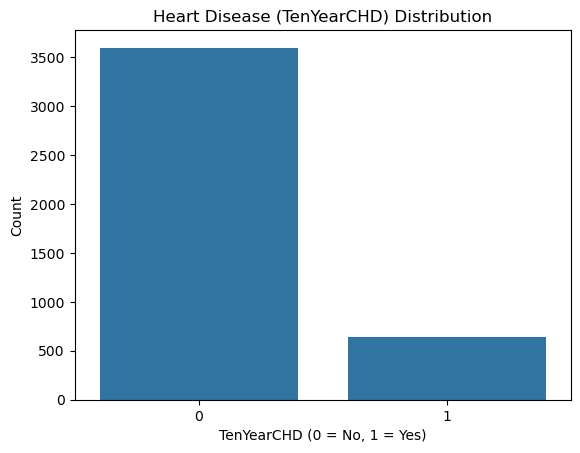


Generating Boxplots for Numerical Columns...


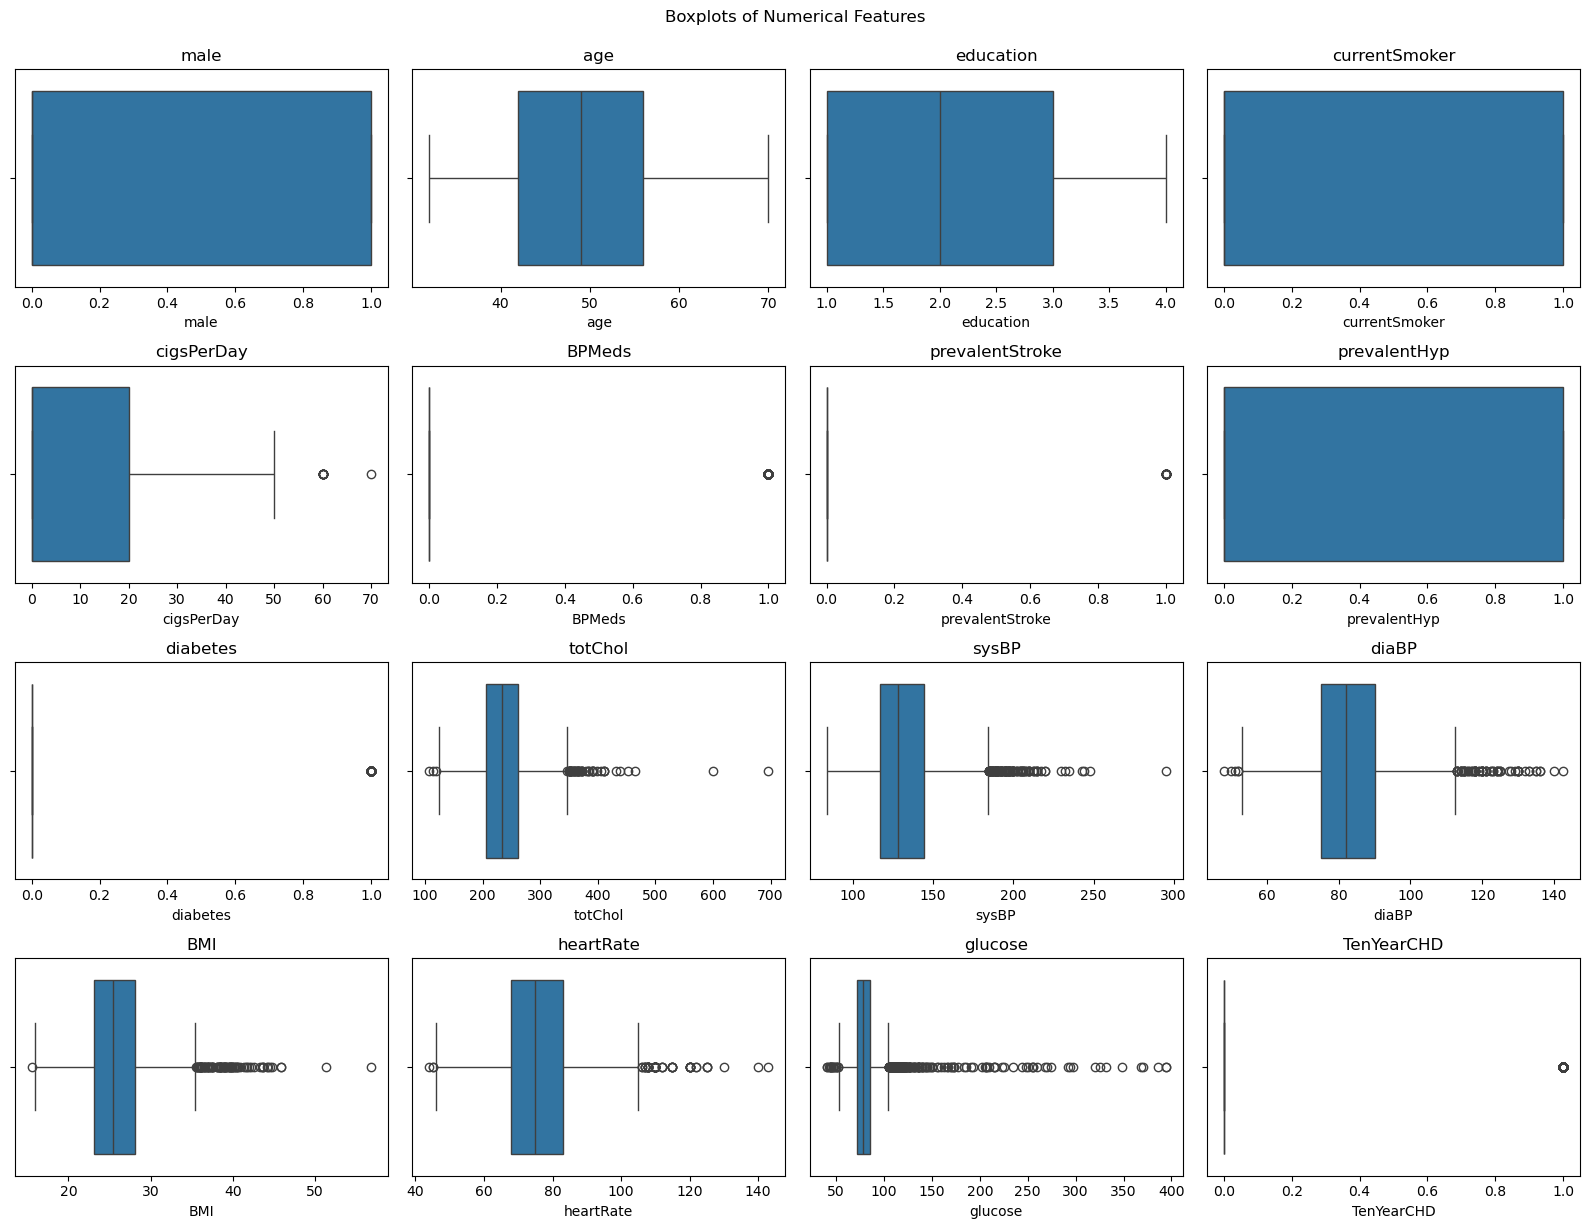

In [6]:
# Basic statistics and visualization

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Basic statistical summary
print("Statistical Summary:")
print(df.describe())

# 2. Histogram for all numeric columns
print("\nGenerating Histograms...")
df.hist(figsize=(15, 10), bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout()
plt.show()

# 3. Count plot for target variable (replace 'TenYearCHD' with your actual target column if different)
print("\nTarget Variable Distribution:")
sns.countplot(data=df, x='TenYearCHD')
plt.title("Heart Disease (TenYearCHD) Distribution")
plt.xlabel("TenYearCHD (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# 4. Boxplots for each numeric column
print("\nGenerating Boxplots for Numerical Columns...")
numeric_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) + 3) // 4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.tight_layout()

plt.suptitle('Boxplots of Numerical Features', y=1.02)
plt.show()



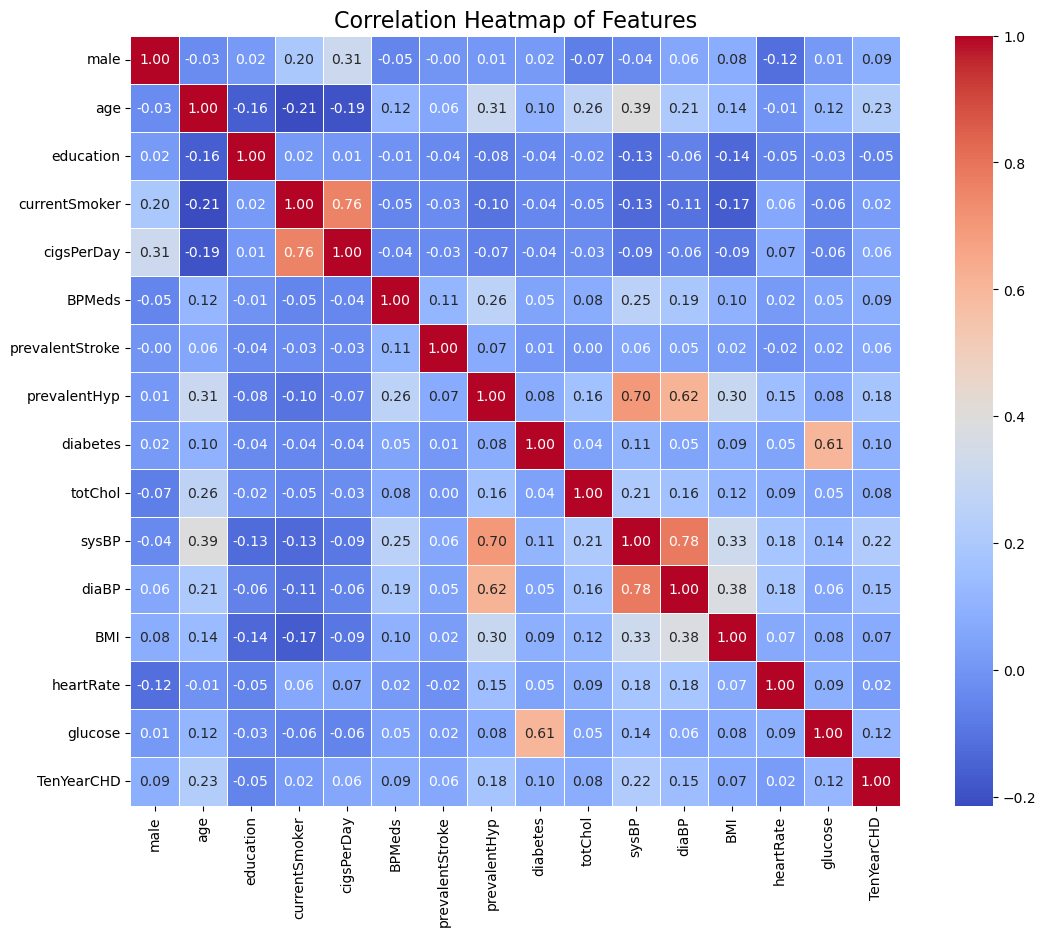

In [7]:
# Correlation heatmap

import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set the figure size
plt.figure(figsize=(14, 10))

# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

plt.title("Correlation Heatmap of Features", fontsize=16)
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import pandas as pd

# Define features and target
X = df.drop('TenYearCHD', axis=1)  # Drop the target column
y = df['TenYearCHD']               # Target column

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training - Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluation
y_pred = model.predict(X_test_scaled)
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Basic Instructions for easier user input

print("""
Please enter the following values as prompted:

|-------------------------------------------------------------------------------------------------------------|
| Feature           | Description                                      | Expected Input                       |
|-------------------|--------------------------------------------------|--------------------------------------|
| male              | Gender                                           | 1 = Male, 0 = Female                 |
|-------------------------------------------------------------------------------------------------------------|
| age               | Age in years                                     | Integer                              |
|-------------------------------------------------------------------------------------------------------------|
| education         | Education Level                                  | 1 = Some High School (no diploma)    |
|                   |                                                  | 2 = High School Diploma or GED       |
|                   |                                                  | 3 = Some College/Vocational School   |
|                   |                                                  | 4 = College Degree (Bachelor's+)     |
|-------------------------------------------------------------------------------------------------------------|
| currentSmoker     | Currently smokes                                 | 1 = Yes, 0 = No                      |
|-------------------------------------------------------------------------------------------------------------|
| cigsPerDay        | Cigarettes smoked per day                        | Integer                              |
|-------------------------------------------------------------------------------------------------------------|
| BPMeds            | On blood pressure meds                           | 1 = Yes, 0 = No                      |
|-------------------------------------------------------------------------------------------------------------|
| prevalentStroke   | Has had a stroke before                          | 1 = Yes, 0 = No                      |
|-------------------------------------------------------------------------------------------------------------|
| prevalentHyp      | Has hypertension                                 | 1 = Yes, 0 = No                      |
|-------------------------------------------------------------------------------------------------------------|
| diabetes          | Has diabetes                                     | 1 = Yes, 0 = No                      |
|-------------------------------------------------------------------------------------------------------------|
| totChol           | Total cholesterol level                          | Integer                              |
|-------------------------------------------------------------------------------------------------------------|
| sysBP             | Systolic blood pressure                          | Float                                |
|-------------------------------------------------------------------------------------------------------------|
| diaBP             | Diastolic blood pressure                         | Float                                |
|-------------------------------------------------------------------------------------------------------------|
| BMI               | Body Mass Index                                  | Float                                |
|-------------------------------------------------------------------------------------------------------------|
| heartRate         | Heart rate (beats per minute)                    | Integer                              |
|-------------------------------------------------------------------------------------------------------------|
| glucose           | Glucose level                                    | Integer                              |
|-------------------------------------------------------------------------------------------------------------|
""")


# Prediction
print("\n--- Heart Disease Risk Prediction ---")
user_input = []
for col in X.columns:
    val = float(input(f"Enter value for {col}: "))
    user_input.append(val)

user_df = pd.DataFrame([user_input], columns=X.columns)
user_array_scaled = scaler.transform(user_df)


prediction = model.predict(user_array_scaled)[0]
probability = model.predict_proba(user_array_scaled)[0][1]

print(f"\nPrediction: {'At Risk (1)' if prediction == 1 else 'Not at Risk (0)'}")
print(f"Probability of Heart Disease: {probability:.2f}")


Accuracy on test data: 0.8549528301886793

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.50      0.04      0.08       123

    accuracy                           0.85       848
   macro avg       0.68      0.52      0.50       848
weighted avg       0.81      0.85      0.80       848


Please enter the following values as prompted:

|-------------------------------------------------------------------------------------------------------------|
| Feature           | Description                                      | Expected Input                       |
|-------------------|--------------------------------------------------|--------------------------------------|
| male              | Gender                                           | 1 = Male, 0 = Female                 |
|------------------------------------------------------------------------------------------------------------

Enter value for male:  0
Enter value for age:  20
Enter value for education:  4
Enter value for currentSmoker:  0
Enter value for cigsPerDay:  0
Enter value for BPMeds:  0
Enter value for prevalentStroke:  0
Enter value for prevalentHyp:  0
Enter value for diabetes:  0
Enter value for totChol:  230
Enter value for sysBP:  130
Enter value for diaBP:  80
Enter value for BMI:  31.5
Enter value for heartRate:  78
Enter value for glucose:  100



Prediction: Not at Risk (0)
Probability of Heart Disease: 0.04


Accuracy: 0.85
Precision: 0.50
Recall: 0.04
F1 Score: 0.08

Confusion Matrix:
[[720   5]
 [118   5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.50      0.04      0.08       123

    accuracy                           0.85       848
   macro avg       0.68      0.52      0.50       848
weighted avg       0.81      0.85      0.80       848

ROC-AUC Score: 0.67


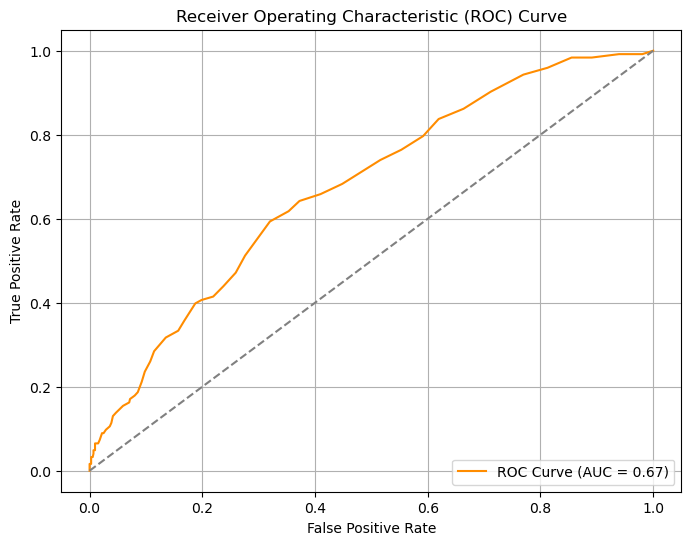

In [14]:
# Evaluation metrics

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
)
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
y_probs = model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Conclusion
- We used the Framingham dataset to predict the risk of heart disease within ten years.
- After preprocessing and exploring the dataset, we used logistic regression for prediction.
- The model provides a reasonable accuracy, and the evaluation metrics show potential for use in early detection.
- Further tuning or trying more advanced models could improve performance.
